# Imports

In [89]:
%matplotlib inline

In [39]:
import dask
import dask.dataframe as dd

In [2]:
import dask.array as da

# Operations

In [ ]:
arr = da.empty()

In [4]:
from pymongo import MongoClient

In [5]:
client = MongoClient()

db = client['glvis_db']
val_collection = db['flattened']

In [6]:
val_collection.estimated_document_count()

50000

In [57]:
import numpy as np

In [58]:
arr = np.empty((val_collection.estimated_document_count(), 2048))

In [60]:
for i, rec in enumerate(val_collection.find()):
    arr[i] = rec['val']

In [66]:
arr.shape

(50000, 2048)

In [91]:
mean = arr.mean(axis=1)

In [69]:
std = arr.std(axis=0)

In [83]:
arr[:,0].std()

0.08885589066853614

In [84]:
std.sort()

In [87]:
import seaborn as sns

/home/snie/anaconda3/envs/glvis/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


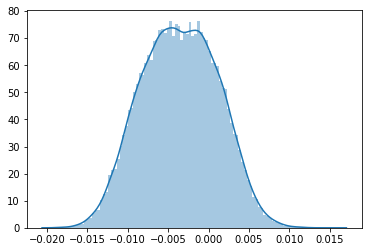

In [97]:
sns.distplot(mean, bins=100)

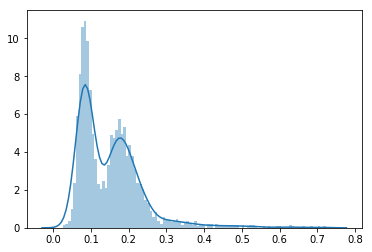

In [98]:
sns.distplot(std, bins=100)

# Misc

In [2]:
df = dd.read_json('/home/snie/Desktop/records.json')

In [3]:
df.head(1)

,_id,label,sentence,val
0,{'$oid': '5c70639d7f9e8a3b268d21b0'},"{'value': 'POSITIVE', 'confidence': 1.0}",I stumbled across rerun syndication of this sh...,"[-0.070280462503433, -0.188353642821311, 0.037..."


In [26]:
df1 = df[df['sentence'].str.contains('worst')]

In [27]:
res = df1.compute()